# DATA SCIENCE SESSIONS VOL. 3
### A Foundational Python Data Science Course
## Session 23: Final Project I. Regression Problem: Can you predict how many riders there will be on one path given how many are on another? 

[&larr; Back to course webpage](https://datakolektiv.com/)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SESSIONS VOL. 3 :: A Foundational Python Data Science Course.

![](../img/IntroRDataScience_NonTech-1.jpg)

### Lecturers

[Goran S. Milovanović, PhD, DataKolektiv, Chief Scientist & Owner](https://www.linkedin.com/in/gmilovanovic/)

[Aleksandar Cvetković, PhD, DataKolektiv, Consultant](https://www.linkedin.com/in/alegzndr/)

[Ilija Lazarević, MA, DataKolektiv, Consultant](https://www.linkedin.com/in/ilijalazarevic/)

![](../img/DK_Logo_100.png)

***

### 0. Setup

In [1]:
### --- Setup - importing the libraries

# - supress those annoying 'Future Warning'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# - data
import numpy as np
import pandas as pd
from datetime import datetime

# - os
import os

# - ml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# - visualization
import matplotlib.pyplot as plt
import seaborn as sns

# - parameters
%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
sns.set_theme()

# - rng
rng = np.random.default_rng(1234)

# - plots
plt.rc("figure", figsize=(8, 6))
plt.rc("font", size=14)
sns.set_theme(style='white')

# - directory tree
data_dir = os.path.join(os.getcwd(), '_data')

### 1. The dataset

In this exercise you will be using `sklearn.ensemble.RandomForestRegressor` (the Random Forest ensemble model for Regression) to train a model to predict the number of rider on a given path from the numbers of riders present at other cycling paths and some time-stamped data.

The data set for this exercise is provided in your `_data` directory as `dss2023_finalProject_01.csv`.

It is based on the **Montreal bike lanes: Use of bike lanes in Montreal city in 2015** data from Kaggle [source](https://www.kaggle.com/datasets/pablomonleon/montreal-bike-lanes). We did some data preparation but you will have to take care about the rest. All necessary steps will be formulated precisely: the rest is you and Python!  

#### 1.1 Load the dataset

Load the `dss2023_finalProject_01.csv`; make sure to use `index_col=[0]` in your call to `pd.read_csv()`.

In [2]:
data_set = pd.read_csv(os.path.join(data_dir, "dss2023_finalProject_01.csv"),
                       index_col=[0])
data_set

,Date,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger
1,01/01/2015,58,12,4,17,49,21,16,16,7,58,91,24,3,17,78,21,6
2,02/01/2015,75,7,5,15,113,27,9,32,11,109,177,32,13,11,57,77,4
3,03/01/2015,79,7,3,7,107,36,12,18,2,71,131,33,5,14,174,40,5
4,04/01/2015,10,1,21,0,35,29,1,0,0,6,11,6,1,1,20,6,0
5,05/01/2015,42,0,2,0,90,21,1,1,6,0,5,49,20,0,41,56,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,11/11/2015,3044,1931,2828,1393,3603,1754,1142,2342,458,2328,3280,1210,338,1534,1527,2860,356
316,12/11/2015,1751,930,1670,888,2048,700,675,1566,152,1345,1877,755,180,960,955,1777,198
317,13/11/2015,1818,906,1711,873,2115,634,477,1522,150,1416,1980,719,204,978,1040,1727,258
318,14/11/2015,979,759,978,322,1112,290,310,601,98,1061,1448,269,70,640,805,737,73


#### 1.2 Produce new categorical predictors from the `Date` variable.

All values from `Date` are from 2015, so we can disregard the year information safely. However, we want to extract two categorical features from the `Date` column:

- the day of week (e.g. "Monday", "Thursday", "Sunday", etc)
- month (e.g. "January", "February", etc).

If we do not do this, our data would be considered a pure time-series - and we do not want to use linear models (such as Poisson, for example) on auto-correlated data! The model will need some information on at least monthly and daily data in order to figure out the time dependencies.

So:

- use all your available knowlegde to figure out how to extract the values for two new columns in `data_set` from the `Data` column:
- the first new column will be `dayOfWeek` (e.g. "Monday", "Thursday", "Sunday", etc)
- the second new column will be `month` (e.g. "January", "February", etc);
- Google (!) to find out how to turn dates from a Pandas DataFrame class into these values - you can also ask ChatGPT to help you if you prefer and until **you are able to understand the code that it suggests, test it, and figure out if it reall does what is required**!

In [3]:
# Convert the 'Date' column to datetime format
data_set['Date'] = pd.to_datetime(data_set['Date'], format='%d/%m/%Y')

# Extract day of the week and month into new columns
data_set['dayOfWeek'] = data_set['Date'].dt.day_name()
data_set['month'] = data_set['Date'].dt.strftime('%B')

# remove Date
data_set.drop('Date', axis=1, inplace=True)

# Print the updated DataFrame
data_set

,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger,dayOfWeek,month
1,58,12,4,17,49,21,16,16,7,58,91,24,3,17,78,21,6,Thursday,January
2,75,7,5,15,113,27,9,32,11,109,177,32,13,11,57,77,4,Friday,January
3,79,7,3,7,107,36,12,18,2,71,131,33,5,14,174,40,5,Saturday,January
4,10,1,21,0,35,29,1,0,0,6,11,6,1,1,20,6,0,Sunday,January
5,42,0,2,0,90,21,1,1,6,0,5,49,20,0,41,56,10,Monday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,3044,1931,2828,1393,3603,1754,1142,2342,458,2328,3280,1210,338,1534,1527,2860,356,Wednesday,November
316,1751,930,1670,888,2048,700,675,1566,152,1345,1877,755,180,960,955,1777,198,Thursday,November
317,1818,906,1711,873,2115,634,477,1522,150,1416,1980,719,204,978,1040,1727,258,Friday,November
318,979,759,978,322,1112,290,310,601,98,1061,1448,269,70,640,805,737,73,Saturday,November


#### 1.3 Dummy Coding: produce dummy coding for `dayOfWeek` and `month`.

**N.B.** We want to use `dayOfWeek_Monday` and `month_January` as references (baselines) in the respective categorical predictors. How would you approach this problems from `pd.get_dummies()`? 

In [4]:
data_set = pd.get_dummies(data_set, columns=['dayOfWeek', 'month'])
# data_set.drop(['month_January', 'dayOfWeek_Monday'], axis=1, inplace=True)
data_set

,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Rachel / Hôtel de Ville,...,month_August,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
1,58,12,4,17,49,21,16,16,7,58,...,0,0,1,0,0,0,0,0,0,0
2,75,7,5,15,113,27,9,32,11,109,...,0,0,1,0,0,0,0,0,0,0
3,79,7,3,7,107,36,12,18,2,71,...,0,0,1,0,0,0,0,0,0,0
4,10,1,21,0,35,29,1,0,0,6,...,0,0,1,0,0,0,0,0,0,0
5,42,0,2,0,90,21,1,1,6,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,3044,1931,2828,1393,3603,1754,1142,2342,458,2328,...,0,0,0,0,0,0,0,1,0,0
316,1751,930,1670,888,2048,700,675,1566,152,1345,...,0,0,0,0,0,0,0,1,0,0
317,1818,906,1711,873,2115,634,477,1522,150,1416,...,0,0,0,0,0,0,0,1,0,0
318,979,759,978,322,1112,290,310,601,98,1061,...,0,0,0,0,0,0,0,1,0,0


#### 1.4 Split into 20% validation and 80% training data

Notice the following from the Setup section: 

`from sklearn.model_selection import train_test_split`

Now, it is extremely easy to make a 80/20 data split with `sklearn`: Google and figure out how to do it. You need to produce two new DataFrames, `train_set` (80% of data) and `validation_set` (20 % of data). Do it:

In [5]:
# Split the data into training and validation sets
train_set, validation_set = train_test_split(data_set, test_size=0.2, random_state=42)

# Check the sizes of the resulting sets
print("Training set size:", len(train_set))
print("Validation set size:", len(validation_set))

Training set size: 255
Validation set size: 64


#### 1.5 Perform a 5-Fold CV of an Random Forest Regressor for the problem at hand

In order to solve this task you will need to combine your understand of 

- the `sklearn.ensemble.RandomForestRegressor` (Session 22)
- and of [`sklearn` pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) that we have used to cross-validate the Poisson Regressor in Session 19.

You need to perform the following steps:

- use only `train_set` for this:
- break-down `data_set` into `X` (your feature matrix) and `y` (your outcome)
- create a pipeline with one `regressor`: `RandomForestRegressor`, and so to use the `criterion` argument set to `Poisson` (c.f. the [sklearn.ensemble.RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) documentation)
- Define the cross-validation grid in the following way:
   - vary `n_estimators` as [50, 100, 150, 200, 300, 500],
   - vary `max_depth` as [3, 4, 5, 6]
   - vary `min_samples_leaf` as [5, 10, 15, 30]
   - vary `max_features` as [5, 10, 15];
   - all these hyperparameters are well-documented in scikit-learn, so read through the documentation thorouhly!
- define your `GridSearchCV()` object and fit it;
- print out the best parameters and the best model score obtained!

In [6]:
# X, y
X = train_set.drop('University', axis=1)
y = train_set['University']

# Create the pipeline
pipeline = Pipeline([
    ('regressor', RandomForestRegressor(criterion='poisson'))
])

# Define the parameter grid for tuning
param_grid = {
    'regressor__n_estimators': [50, 100, 150, 200, 300, 500],
    'regressor__max_depth': [3, 4, 5, 6],
    'regressor__min_samples_leaf': [5, 10, 15, 30],
    'regressor__max_features': [5, 10, 15]
}

# Create a cross-validation strategy
cv = KFold(n_splits=5)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=cv)

# Fit the grid search to your data
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'regressor__max_depth': 6, 'regressor__max_features': 15, 'regressor__min_samples_leaf': 5, 'regressor__n_estimators': 300}
Best Score:  0.9856226795668505


#### 1.6 Now Refit the best model on the whole  `training_set` w/o cross-validation!

Define your `RandomForestRegressor()` with the best obtained hyperparameters from CV and re-train it on the whole training set w/o cross-validation.

In [7]:
# Create the RandomForestRegressor with the best parameters
best_regressor = RandomForestRegressor(criterion='poisson',
                                       n_estimators=grid_search.best_params_['regressor__n_estimators'],
                                       max_depth=grid_search.best_params_['regressor__max_depth'],
                                       min_samples_leaf=grid_search.best_params_['regressor__min_samples_leaf'],
                                       max_features=grid_search.best_params_['regressor__max_features'])

# Fit the best model on the entire dataset
best_regressor.fit(X, y)

RandomForestRegressor(criterion='poisson', max_depth=6, max_features=15,
                      min_samples_leaf=5, n_estimators=300)

What is the model score?
**BTW**, what is the default score used in `RandomForestRegressor()`?

In [8]:
best_regressor.score(X, y)

0.9946666434221538

If you take a look at the Setup section of this notebook, you might notice the following:

`from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score`

Read trough the relevant documentation (Google!), then compute 

- MSE
- MAE, and
- R2

for the best model (hint: you will need to use `predict()` first).

In [9]:
# Make predictions on the entire dataset using the best model
y_pred = best_regressor.predict(X)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared (R^2) Score: ", r2)

Mean Squared Error (MSE):  13798.256960980807
Mean Absolute Error (MAE):  77.9365913968328
R-squared (R^2) Score:  0.9946666434221538


Plot the `observed` vs. `predicted` values from the best obtained model

<AxesSubplot: xlabel='observed', ylabel='predicted'>

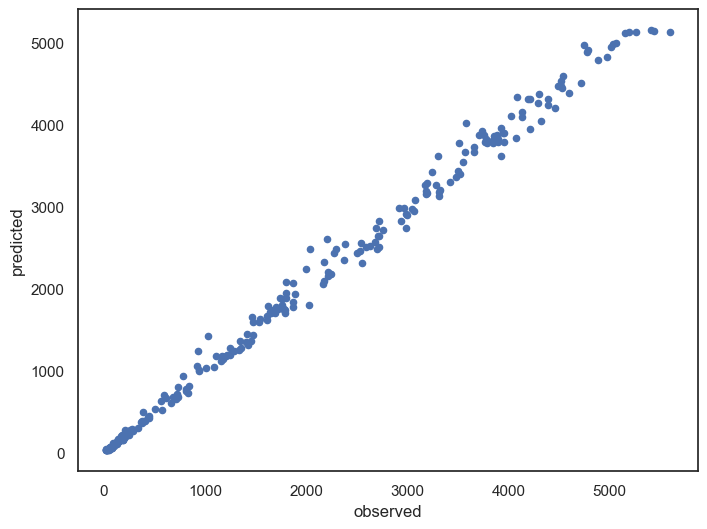

In [10]:
predictions = pd.DataFrame({"observed":y, "predicted":y_pred})
predictions.plot.scatter(x="observed", y="predicted")

### 2. And what about the `validation_set`..?

#### 2.1 Provide the best model MSE, MAE, and R2 for the `validation_set`:

In [11]:
# split validation set into features and outcome
X = validation_set.drop('University', axis=1)
y = validation_set['University']

# Make predictions on the entire dataset using the best model
y_pred = best_regressor.predict(X)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared (R^2) Score: ", r2)

Mean Squared Error (MSE):  46912.80714711664
Mean Absolute Error (MAE):  129.30302791324274
R-squared (R^2) Score:  0.9837695066563699


#### 2.2 Plot the `observed` vs. `predicted` values from the best obtained model for the `validation_set`

<AxesSubplot: xlabel='observed', ylabel='predicted'>

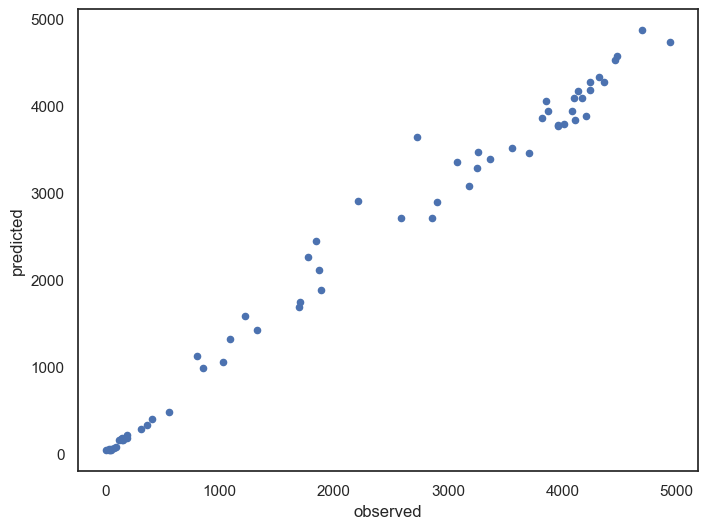

In [12]:
predictions = pd.DataFrame({"observed":y, "predicted":y_pred})
predictions.plot.scatter(x="observed", y="predicted")

***

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: [GPLv3](https://www.gnu.org/licenses/gpl-3.0.txt) This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see http://www.gnu.org/licenses/.</font>